In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from matplotlib import rc
import matplotlib as mpl
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

In [93]:
def read_index(idx):
    star = np.load('m12i_positions/star_m12i_id' + str(idx)+'.npy')
    gas = np.load('m12i_positions/gas_m12i_id' + str(idx)+'.npy')
    dark = np.load('m12i_positions/dark_m12i_id' + str(idx)+'.npy')
#     return np.concatenate((star))
    return gas

In [94]:
indices = np.arange(590, 601)
times = [13.77655729,
         13.77877760,
         13.78099605,
         13.78321595,
         13.78543563,
         13.78765511,
         13.78987438,
         13.79209261,
         13.79430981,
         13.79652845,
         13.79874688]
times = np.array(times)
times -= times[0]
times *= 1000
print(times)

[ 0.       2.22031  4.43876  6.65866  8.87834 11.09782 13.31709 15.53532
 17.75252 19.97116 22.18959]


In [95]:
Cinit1 = 4.25
Cinit2 = 6.1
slope = -0.21
dphidt = 0.025
R = np.linspace(7.2, 9.2, 300)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


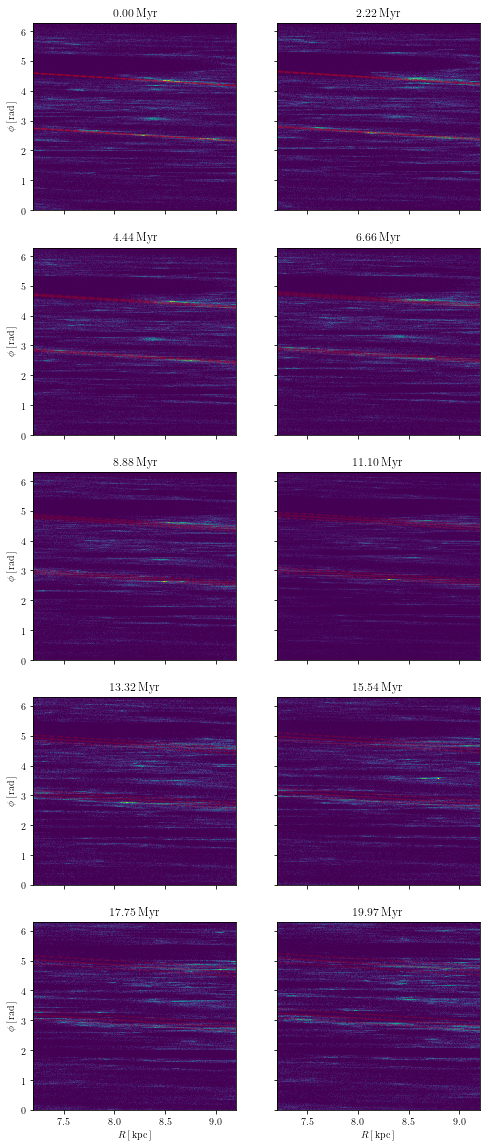

In [103]:
fig, ax = plt.subplots(5,2, figsize=(8, 20), sharex=True, sharey=True, squeeze=True)
alpha = 0.2

ax[0][0].set_ylabel(r'$\phi\,[\,\text{rad}\,]$')
ax[1][0].set_ylabel(r'$\phi\,[\,\text{rad}\,]$')
ax[2][0].set_ylabel(r'$\phi\,[\,\text{rad}\,]$')
ax[3][0].set_ylabel(r'$\phi\,[\,\text{rad}\,]$')
ax[4][0].set_ylabel(r'$\phi\,[\,\text{rad}\,]$')

ax[4][0].set_xlabel(r'$R\,[\,\text{kpc}\,]$')
ax[4][1].set_xlabel(r'$R\,[\,\text{kpc}\,]$')

for idx, t, this_ax in zip(indices, times, ax.flatten()):
    test = read_index(idx)
    this_ax.hist2d(test[:,0], test[:,2], bins=300);
    this_ax.set_title(r'$' + "{0:.2f}".format(t) + r'\,\text{Myr}$')

    phi1 = slope*R + Cinit1 + dphidt * t
    phi2 = slope*R + Cinit2 + dphidt * t
    this_ax.plot(R, phi1, c='r', alpha=alpha);
    this_ax.plot(R, phi2, c='r', alpha=alpha);
    
    phi1 = slope*R + Cinit1 + 1.3*dphidt * t
    phi2 = slope*R + Cinit2 + 1.3*dphidt * t
    this_ax.plot(R, phi1, c='r', alpha=alpha, ls='dashed');
    this_ax.plot(R, phi2, c='r', alpha=alpha, ls='dashed');

    phi1 = slope*R + Cinit1 + 0.7*dphidt * t
    phi2 = slope*R + Cinit2 + 0.7*dphidt * t
    this_ax.plot(R, phi1, c='r', alpha=alpha, ls='dashed');
    this_ax.plot(R, phi2, c='r', alpha=alpha, ls='dashed');